#### Imports

In [137]:
%matplotlib inline

####################

import time
import datetime

import numpy as np
np.set_printoptions(suppress=True) # suppress scientific notation in NumPy output
  # see the following discussion for more information
  # https://stackoverflow.com/questions/9777783/suppress-scientific-notation-in-numpy-when-creating-array-from-nested-list
import numpy.random as npr
import numpy_financial as npf
import pandas as pd
from pylab import mpl, plt
import seaborn as sns
plt.style.use('seaborn')
#plt.style.available # display available styles
plt.rcParams['figure.figsize'] = (10, 6)

from scipy.spatial.distance import pdist, squareform
  # squareform(pdist(ndarray, metric='minkowski', p=2))
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import signal # signal processing
  # https://www.gaussianwaves.com/2010/11/moving-average-filter-ma-filter-2/

####################

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale, StandardScaler

# Decision Tree Classifier [sklearn]
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image

# Linear Classifiers [sklearn]
from sklearn.linear_model import LinearRegression, LogisticRegression

# SVM [sklearn]
from sklearn.svm import SVC

# KNN Classifier [sklearn]
from sklearn.neighbors import KNeighborsClassifier

# Ensembling [sklearn]
from sklearn import ensemble

# Performance Evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

####################

import statsmodels.api as sm
  # Hodrick-Prescott Filter: decomposes a time series into shorter-term fluctuations and longer-term trends
  #   ts_noise, ts_trend = sm.tsa.filters.hpfilter(df)
  #   ts_noise.plot();
  #   ts_trend.plot();
from statsmodels.tsa.seasonal import seasonal_decompose
  # time series decomposition: seasonal_decompose(df, model='multiplicative').plot();
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
  # Autocorrelation and Partial Autocorrelation
from statsmodels.tsa.stattools import adfuller
  # Augmented Dickey-Fuller statistical test for stationarity (p-value < 0.05 is stationary)
    
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

from statsmodels.tsa.arima_model import ARMA, ARIMA
  # model_arma = ARMA(df, order=(1, 1))
  # model_arima = ARIMA(df, order=(1, 1, 1))
  # results = model.fit()
  # results.summary()
from statsmodels.tsa.arima.model import ARIMA

from arch import arch_model

####################

import warnings
warnings.filterwarnings('ignore')

---
---
---

# Table of Contents

0. Data
1. Data I/O
2. Descriptive Data Analysis and Summary Statistics
3. Data Preprocessing and Feature Engineering
4. Normality Testing
5. ML Machine Learning Framework
6. Regression
7. Supervised ML: Classification
    - Binary Classification Performance Evaluation
    - Multiclass Classification Performance Evaluation
8. Statistics
9. Probability Theory
10. Stochastic Processes and Time Series
11. DSP Digital Signal Processing and Filters
12. Mathematical Finance
13. Mathematical Functions
14. Resources

---
---
---

# Data [Wiki](https://en.wikipedia.org/wiki/Data)

---

Data Object<br>
Data Attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Quantitative Attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Continuous Attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Qualitative Attribute<br>

Data Type<br>
Data Quality<br>
- noise
- outliers
- missing data
- inconsistent data
- duplicate data
- bias
- unrepresentative data

Structured Data<br>
Semi Structured Data<br>
Unstructured Data<br>

---
---
---

# Data I/O

`np.load('.npy')`<br>
`np.loadtxt('.csv', delimiter=',')`<br>

`pd.read_csv('.csv', index_col=0, parse_dates=True, infer_datetime_format=True)`<br>

`with open('.csv', 'r') as input_file:`<br>

---
---
---

# Descriptive Data Analysis and Summary Statistics

---

__Dataset__ $X$ [Wiki](https://en.wikipedia.org/wiki/Data_set)<br>
$$X = \{ x_1, x_2, ..., x_n \}$$
where $x_i$ for $i = 1, 2, ..., n$ are data objects, data points, data instances, etc. [Wiki](https://en.wikipedia.org/wiki/Data)<br>

__Dataset Size or Count__ $n$<br>

__Maximum__ max<br>
$$\text{max} = x_i \in X \,\text{s.t.}\, x_i \ge x_j \,\,\,\forall x_j \in X, j \ne i$$

__Minimum__ min<br>
$$\text{min} = x_i \in X \,\text{s.t.}\, x_i \le x_j \,\,\,\forall x_j \in X, j \ne i$$

__Outlier__<br>
$x_i \in \{x_i $ s.t. $ x_i \lt \text{Q}_1 - 1.5\times\text{IQR} $ or $ x_i \gt \text{Q}_3 + 1.5\times\text{IQR}\}$

__k-th Quantile__
$x_i$ s.t. $\left(\frac{100}{q}k\right)$% of the data values are $\leq x_i$ and $(100 - \frac{100}{q}k)$% of the data values are $\geq x_i$ where $0 \leq k \leq q$ <br>

__k-th Percentile__
$x_i$ s.t. $k$% of the data values are $\leq x_i$ and $(100 - k)$% of the data values are $\geq x_i$ where $0 \leq k \leq 100$ <br>

__k-th Quartile__
$x_i$ s.t. $(25k)$% of the data values are $\leq x_i$ and $(100 - 25k)$% of the data values are $\geq x_i$ where $0 \leq k \leq 4$ <br>

---

## Measures of Central Tendency [Wiki](https://en.wikipedia.org/wiki/Central_tendency) or Averages [Wiki](https://en.wikipedia.org/wiki/Average)

### Pythagorean Means [Wiki](https://en.wikipedia.org/wiki/Pythagorean_means)

__Arithmetic Mean__ $\mu_a$ [Wiki](https://en.wikipedia.org/wiki/Arithmetic_mean)<br>
$$
\begin{align}
\mu_a
&= \frac{\sum_{i = 1}^n x_i}{n} \\
&= \frac{x_1 + x_2 + ... + x_n}{n} \\
\end{align}
$$

Population Mean $\mu$ <br>
Sample Mean $\bar{x} = \frac{\sum x_i}{n}$ <br>

__Geometric Mean__ $\mu_g$ [Wiki](https://en.wikipedia.org/wiki/Geometric_mean)<br>
the $n$th root of the product of $n$ numbers<br>
$$
\begin{align}
\mu_g
&= \left( \prod_{i = 1}^n x_i \right)^{\frac{1}{n}} \\
&= \sqrt[n]{x_1x_2...x_n} \\
\end{align}
$$

__Harmonic Mean__ $\mu_h$ [Wiki](https://en.wikipedia.org/wiki/Harmonic_mean)<br>
"the reciprocal of the arithmetic mean of the reciprocals"<br>
$$
\begin{align}
\mu_h
&= \left( \frac{\sum_{i = 1}^n x_i^{-1}}{n} \right)^{-1} = \frac{n}{\sum_{i = 1}^n \frac{1}{x_i}} \\
&= \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + ... + \frac{1}{x_n}} \\
\end{align}
$$

__Median (50th Percentile)__ $M$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    If $n$ is odd, then $M = x_i$ s.t. $x_i$ is the $\frac{(n + 1)}{2}$-th element <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    If $n$ is even, then $M$ is the average of the $\frac{n}{2}$-th and $\frac{n}{2} + 1$-th elements <br>

__Mode__<br>

---

## Measures of Dispersion [Wiki](https://en.wikipedia.org/wiki/Statistical_dispersion)

__Range__ [Wiki](https://en.wikipedia.org/wiki/Range_(statistics))<br>
$$\text{Range} = \text{maximum} - \text{minimum}$$

__Interquartile Range__ IQR [Wiki](https://en.wikipedia.org/wiki/Interquartile_range)<br>
$$\text{IQR} = \text{Q}_3 - \text{Q}_1 \,\,\,\text{where Q}_1 \text{is the Lower Quartile (25th Percentile) and Q}_3 \text{is the Upper Quartile (75th Percentile)}$$

__Standard Deviation__ [Wiki](https://en.wikipedia.org/wiki/Standard_deviation)<br>
Population Standard Deviation $\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{n}}$ <br>
Sample Standard Deviation $s = \sqrt{\frac{\sum(x_i - \bar{x})^2}{n - 1}}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 1. Calculate the sample mean. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 2. For each observation, calculate the difference between the data value and the mean. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 3. Square each difference calculated in step 2. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 4. Sum the squared differences calculated in step 3, and then divide this sum by n - 1. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    Step 5. Take the square root of the variance calculated in step 4. <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    For normally distributed $n \geq 200$, $s \approx \frac{\text{Range}}{6}$<br>
    
__Variance__ [Wiki](https://en.wikipedia.org/wiki/Variance)<br>
Population Variance $\sigma^2$ <br>
Sample Variance $s^2 = \frac{\sum(x_i - \bar{x})^2}{n - 1}$ <br>

__Mean Absolute Difference__ [Wiki](https://en.wikipedia.org/wiki/Mean_absolute_difference)<br>

__Mean Absolute Deviation__ [Wiki](https://en.wikipedia.org/wiki/Average_absolute_deviation)<br>

__Median Absolute Deviation__ [Wiki](https://en.wikipedia.org/wiki/Median_absolute_deviation)<br>

---

Pearson's Product-Moment Correlation Coefficient $r = \frac{1}{n - 1} \sum_i \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$ where $-1 \leq r \leq 1$ <br>
Squared Correlation $r^2$ where $0 \leq r^2 \leq 1$ <br>

Covariance <br>

Skewness [Wiki](https://en.wikipedia.org/wiki/Skewness)<br>
Kurtosis [Wiki](https://en.wikipedia.org/wiki/Kurtosis)<br>
Odds [Wiki](https://en.wikipedia.org/wiki/Odds)<br>
Odds Ratio [Wiki](https://en.wikipedia.org/wiki/Odds_ratio)<br>

---

## Proximity Measures (Similarity and Dissimilarity)

proximity measures are used in clustering, nearest-neighbors classification, and anomaly detection<br>
usually, the intial dataset is not needed once proximities are computed<br>
the initial dataset is transformed to a proximity space prior to data analysis<br>

Proximity Measures between objects with a single attribute<br>
Proximity Measures between objects with more than one attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Jaccard Similarity<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Cosine Similarity<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Kernel Methods<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Distance Measures and Metrics<br>
Proximity Measures between Attributes<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Correlation<br>
&nbsp;&nbsp;&nbsp;&nbsp;
MI Mutual Information<br>

__Proximity (Similarity and Dissimilarity)__<br>
the proximity between two data objects is a function of the proximity between the corresponding attributes of the two objects<br>

__Similarity__ between two data objects is a numerical measure of the degree to which the two objects are alike<br>
usually $\in [0, 1]$ where $0$ is no similarity between pairs of objects and $1$ is complete similarity between pairs of objects<br>

__Dissimilarity__ between two data objects is a numerical measure of the degree to which the two objects are not alike<br>
sometimes $\in [0, 1]$<br>
sometimes $\in [0, \infty]$<br>

---

### Jaccard Proximity Measure

useful for sparse data such as documents<br>

---

### Cosine Proximity Measure

useful for sparse data such as documents<br>

---

### Distance Measures and Metrics

distance measures specify different ways of combining the differences in each dimension/attribute into an overall distance<br>
useful for non-sparse data such as time series and multi-dimensional points<br>

__Minkowski Distance__ $d$ between two points $\textbf{x} = (x_1, x_2, ..., x_n)$ and $\textbf{y} = (y_1, y_2, ..., y_n)$<br>
$$d(\textbf{x}, \textbf{y}) = \left( \sum_{k = 1}^n |x_k - y_k|^r \right)^{\frac{1}{r}}$$

__Manhattan Distance ($L_1$ Norm)__ $d$ between two points $\textbf{x} = (x_1, x_2, ..., x_n)$ and $\textbf{y} = (y_1, y_2, ..., y_n)$<br>
Minkowski $r = 1$<br>
$$d(\textbf{x}, \textbf{y}) = \sum_{k = 1}^n |x_k - y_k|$$

__Hamming Distance__ is the Manhattan distance between binary vectors where $x_k, y_k \in \{0, 1\}$<br>

__Euclidean Distance ($L_2$ Norm)__ $d$ between two points $\textbf{x} = (x_1, x_2, ..., x_n)$ and $\textbf{y} = (y_1, y_2, ..., y_n)$<br>
Minkowski $r = 2$<br>
$$d(\textbf{x}, \textbf{y}) = \sqrt{\sum_{k = 1}^n (x_k - y_k)^2}$$

__Supremum Distance ($L_{\infty}$ Norm)__ $d$ between two points $\textbf{x} = (x_1, x_2, ..., x_n)$ and $\textbf{y} = (y_1, y_2, ..., y_n)$<br>
the maximum difference between any attribute of the objects<br>
$$d(\textbf{x}, \textbf{y}) = \lim_{r \rightarrow \infty} \left( \sum_{k = 1}^n |x_k - y_k|^r \right)^{\frac{1}{r}}$$

__Correlation Distance__<br>

---

distance measures in scipy

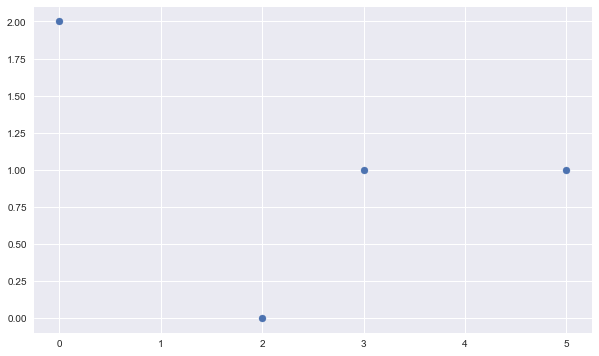

In [2]:
x = np.array([[0, 2],[2, 0], [3, 1], [5, 1]])
plt.scatter(x[:, 0], x[:, 1]);

In [4]:
# manhattan distance matrix
np.round(squareform(pdist(x, metric='cityblock')), 3)

array([[0., 4., 4., 6.],
       [4., 0., 2., 4.],
       [4., 2., 0., 2.],
       [6., 4., 2., 0.]])

In [5]:
# euclidean distance matrix
np.round(squareform(pdist(x, metric='euclidean')), 3)

array([[0.   , 2.828, 3.162, 5.099],
       [2.828, 0.   , 1.414, 3.162],
       [3.162, 1.414, 0.   , 2.   ],
       [5.099, 3.162, 2.   , 0.   ]])

In [6]:
# supremum distance matrix
np.round(squareform(pdist(x, metric='minkowski', p=np.inf)), 3)

array([[0., 2., 3., 5.],
       [2., 0., 1., 3.],
       [3., 1., 0., 2.],
       [5., 3., 2., 0.]])

---

### MI Mutual Information

useful for different kinds of data and for detecting nonlinear relationships<br>

---
---
---

# Data Preprocessing and Feature Engineering [Wiki](https://en.wikipedia.org/wiki/Feature_engineering)

__Binarization__<br>

__Dimensionality Reduction__ [Wiki](https://en.wikipedia.org/wiki/Dimensionality_reduction)<br>

__Discretization__<br>

__Dummification__ [Wiki](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))<br>

__Encoding__<br>
One Hot Encoding [Wiki](https://en.wikipedia.org/wiki/One-hot)<br>

__Feature Subset Selection__<br>

Centering Matrix [Wiki](https://en.wikipedia.org/wiki/Centering_matrix)<br>
Normalization [Wiki](https://en.wikipedia.org/wiki/Normalization_(statistics))<br>

---

### Data Transformation [Wiki](https://en.wikipedia.org/wiki/Data_transformation_(statistics))

linear transformations preserve the relative distance between data points while changing their location and/or dispersion<br>

#### Feature Scaling [Wiki](https://en.wikipedia.org/wiki/Feature_scaling)

__$[a, b]$ Scaling (Min-Max Normalization)__<br>
$$
\begin{align}
x' &= a + \frac{(x - x_{\text{min}})(b - a)}{x_\text{max} - x_\text{min}} & \text{where}\, x \,\text{is the original value and}\, x' \,\text{is the normalized value} \\
\end{align}
$$

__Mean Normalization__<br>
$$
\begin{align}
x' &= \frac{x - \bar{x}}{x_\text{max} - x_\text{min}} & \text{where}\, x \,\text{is the original value and}\, x' \,\text{is the normalized value} \\
\end{align}
$$

__Standardization (z-Score Normalization)__<br>
Standardized z-Score $z = \frac{x_i - \bar{x}}{s}$
$$
\begin{align}
x' &= \frac{x - \bar{x}}{\sigma} & \text{where}\, x \,\text{is the original value and}\, x' \,\text{is the normalized value} \\
\end{align}
$$

__Zero Centering__<br>
Suppose you have a dataset $X_{\text{not zero-centered}}$ whose arithmetic mean is $\bar{X}_{\text{not zero-centered}} \ne 0$<br>
The zero-centered dataset is given by $X_{\text{zero-centered}} = X_{\text{not zero-centered}} - \bar{X}_{\text{not zero-centered}}$<br>
$\bar{X}_{\text{zero-centered}} = 0$<br>

---

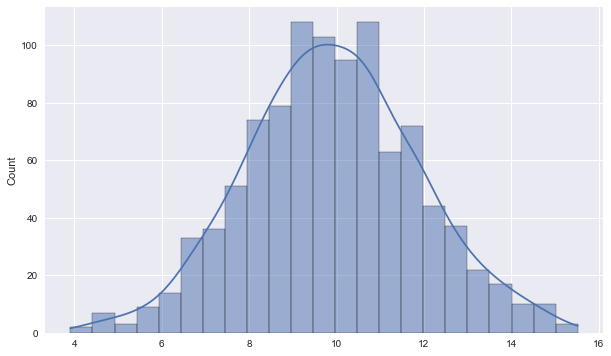

In [105]:
# original data
npr.seed(0)
data = npr.normal(loc=10, scale=2, size=int(1e3), )
sns.histplot(data, kde=True);
#plt.hist(data, bins=100);

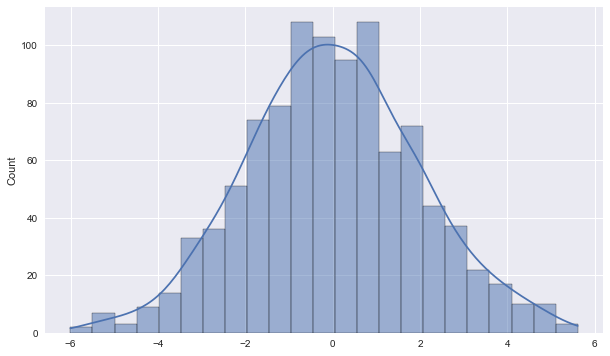

In [104]:
# zero-centered data
npr.seed(0)
data = npr.normal(loc=10, scale=2, size=int(1e3))
data = data - data.mean()
sns.histplot(data, kde=True);
#plt.hist(data, bins=100);

1.0

0.0

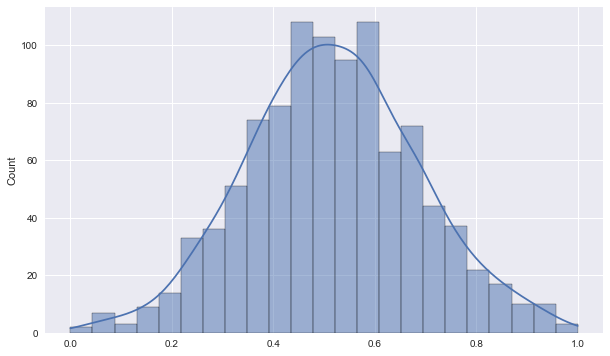

In [103]:
# [0, 1]-scaled data
npr.seed(0)
data = npr.normal(loc=10, scale=2, size=int(1e3))
data = (data - data.min())/(data.max() - data.min())
display(data.max(), data.min())
sns.histplot(data, kde=True);
#plt.hist(data, bins=100);

15.518710228043165

3.9077138904001467

5.609223643023556

-6.001772694619462

11.61099633764302

0.483095806760215

-0.5169041932397849

0.9999999999999999

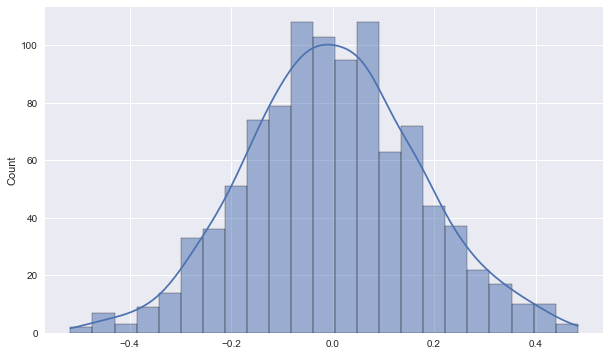

In [102]:
# normalized data (zero-centered, unit-scaled)
npr.seed(0)
data = npr.normal(loc=10, scale=2, size=int(1e3))
display(
    data.max(),
    data.min(),
    data.max() - data.mean(),
    data.min() - data.mean(),
    data.max() - data.min()
)
data = (data - data.mean())/(data.max() - data.min())
display(
    data.max(),
    data.min(),
    data.max() - data.min()
)
sns.histplot(data, kde=True);
#plt.hist(data, bins=100);

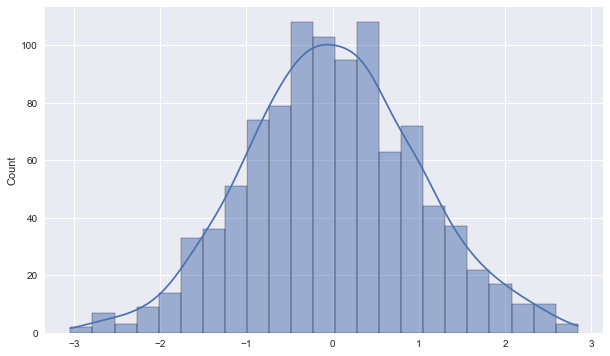

In [100]:
# standardized data
npr.seed(0)
data = npr.normal(loc=10, scale=2, size=int(1e3))
data = (data - data.mean())/(data.std())
sns.histplot(data, kde=True);
#plt.hist(data, bins=100);

---

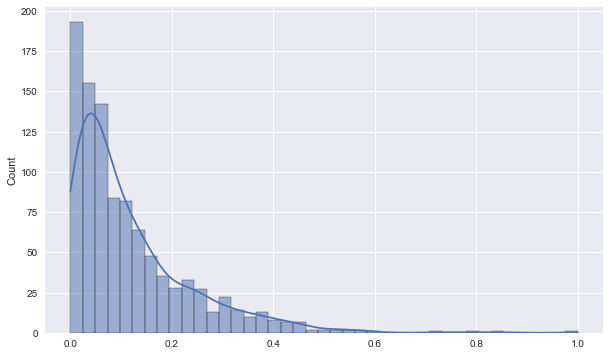

In [101]:
npr.seed(0)
data = npr.exponential(size=int(1e3))
data = minmax_scale(data)
sns.histplot(data, kde=True);

---
---
---

# Normality Testing [Wiki](https://en.wikipedia.org/wiki/Normality_test)

---
---
---

# ML Machine Learning Framework

A __machine learning algorithm__ is an algorithm that is capable of improving a computer program's performance at some task via experience<br>

---

## Model Overfitting

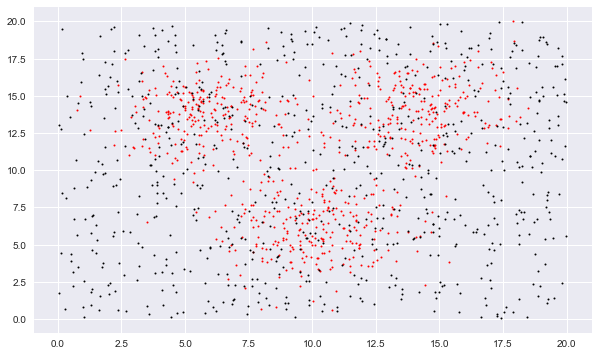

In [7]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
plt.plot(X[:int(N/2), 0], X[:int(N/2), 1], 'r.', X[int(N/2):, 0], X[int(N/2):, 1], 'k.', ms=4);

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
display(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(300, 2)

(1200, 2)

(300,)

(1200,)

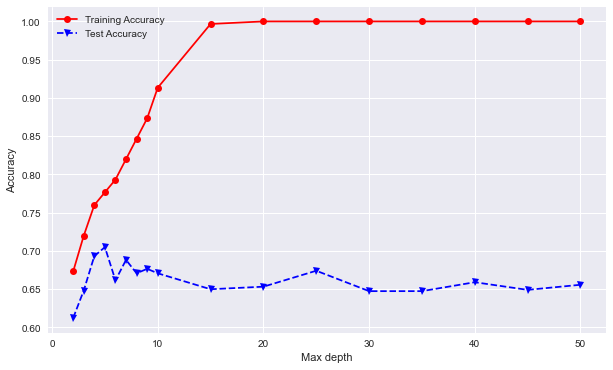

In [9]:
maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

for i, depth in enumerate(maxdepths):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[i] = accuracy_score(Y_train, Y_predTrain)
    testAcc[i] = accuracy_score(Y_test, Y_predTest)

plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--');
plt.legend(['Training Accuracy', 'Test Accuracy']);
plt.xlabel('Max depth');
plt.ylabel('Accuracy');

---
---
---

# Regression [Wiki](https://en.wikipedia.org/wiki/Regression_analysis)

---

### Linear Regression

given: input vector $X^T = (X_1, ..., X_p) \in \mathbb{R}^p$<br>
objective: predict a real-valued output $Y \in \mathbb{R}$<br>
output: a linear function of the input<br>

__Linear Regression Model__<br>
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^p X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 + ... + X_j \beta_j \\
\end{align}
$$

assumption: the regression function $\text{E}(Y|X)$ is linear or the linear model is a reasonable approximation<br>

the variables $X_j$ can come from different sources:<br>
  1. quantitative inputs
  2. transformations of quantitative inputs, such as log, square-root, or square
  3. basis expansions, such as $X_2 = X_1^2$, $X_3 = X_1^3$, leading to a polynomial representation
  4. numeric or "dummy" coding of the levels of qualitative inputs. For example, if $G$ is a five-level factor input, we might create $X_j$, $j = 1, ..., 5$, such that $X_j = I(G = j)$. Together this group of $X_j$ represents the effect of $G$ by a set of level-dependent constants, since in $\sum_{j = 1}^5 X_j \beta_j$, one of the $X_j$s is one, and the others are zero
  5. interactions between variables, for example, $X_3 = X_1 \cdot X_2$
  
no matter the source of the $X_j$, the model is linear in the parameters<br>


Let $\textbf{X}_{[N \times (p + 1)]}$ be the $N \times (p + 1)$ matrix with each row an input vector<br>
$$
\textbf{X}
=
\begin{bmatrix}
X_1 & ... & X_{p + 1} \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & ... & x_{1, p + 1} \\
... & ... & ... \\
x_{N1} & ... & x_{N, p + 1} \\
\end{bmatrix}
$$
Let $\textbf{y}_{[N \times 1]}$ be the $N$-vector of outputs in the training set<br>


the $\beta_j$s are unknown parameters or coefficients<br>
Training Data may be used to estimate the parameters $\beta$<br>
$$x = {(x_1, y_1), ..., (x_N, y_N)}$$
$$x_i = (x_{i1}, ..., x_{ip})^T$$
Parameter Estimation Methods:<br>
  1. Least Squares
 
__Least Squares Optimality Criterion__<br>
pick the coefficients $\beta = (\beta_0, ..., \beta_p)^T$ to minimize the residual sum of squares

__Residual__<br>
$$\hat{y} - y$$

__RSS Residual Sum of Squares__<br>
measures the average lack of fit<br>
$$
\begin{align}
\text{RSS}(\beta)
&= \sum_{i = 1}^N (y_i - f(x_i))^2 \\
&= \sum_{i = 1}^N \left(y_i - \beta_0 - \sum_{j = 1}^p x_{ij} \beta_j \right)^2 \\
&= (\textbf{y} - \textbf{X}\beta)^T (\textbf{y} - \textbf{X}\beta)
& \,\,\,\text{this is a quadratic function in the}\, p + 1 \,\text{parameters} \\
&= (\textbf{y}^T - \beta^T\textbf{X}^T) (\textbf{y} - \textbf{X}\beta) \\
&= \textbf{y}^T\textbf{y} - \textbf{y}^T\textbf{X}\beta - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - (\textbf{y}^T\textbf{X}\beta)^T - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - \beta^T\textbf{X}^T\textbf{y} - \beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
&= \textbf{y}^T\textbf{y} - 2\beta^T\textbf{X}^T\textbf{y} + \beta^T\textbf{X}^T\textbf{X}\beta \\
\frac{\partial \text{RSS}}{\partial \beta} &= -2\textbf{X}^T\textbf{y} + 2\textbf{X}^T\textbf{X}\beta \\
&= -2\textbf{X}^T (\textbf{y} - \textbf{X} \beta)
& \text{first partial derivative with respect to}\, \beta \\
\frac{\partial^2 \text{RSS}}{\partial \beta \partial \beta^T} &= 2\textbf{X}^T \textbf{X}
& \text{second partial derivative with respect to}\, \beta \\
0 &= \textbf{X}^T (\textbf{y} - \textbf{X} \beta)
& \text{set the first partial derivative to zero assuming X has full column rank} \\
\hat{\beta} &= (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
& \text{unique solution} \\
\hat{\textbf{y}} = \textbf{X} \hat{\beta} &= \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
\,\text{where}\, \hat{y}_i = \hat{f}(x_i)
& \text{the fitted values at the training inputs} \\
\hat{\textbf{y}} = \textbf{Hy} &= \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \textbf{y}
& \text{Hat matrix}\, \textbf{H} = \textbf{X} (\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T \\
\end{align}
$$

---

Simple Linear Regression $\hat{y} = b_0 + b_1x$ <br>
Least Squares (Least Sum of Squared Errors) <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    $b_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    $b_0 = \bar{y} - b_1\bar{x}$ <br>
Residual (Prediction Error) $= y - \hat{y}$ <br>
Sum of Squared Errors SSE $= \sum (y - \hat{y})^2$ <br>

---

__Linear Regression in $\mathbb{R}^2$__
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^1 X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 \\
\end{align}
$$

$$
\textbf{X}
=
\begin{bmatrix}
X_1 \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} \\
... \\
x_{N1} \\
\end{bmatrix}
$$

---

__Linear Regression in $\mathbb{R}^3$__
$$
\begin{align}
f(X)
& = \beta_0 + \sum_{j = 1}^2 X_j \beta_j \\
& = \beta_0 + X_1 \beta_1 + X_2 \beta_2 \\
\end{align}
$$

$$
\textbf{X}
=
\begin{bmatrix}
X_1 & X_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} \\
... & ... \\
x_{N1} & x_{N2} \\
\end{bmatrix}
$$

---

Linear Regression example implemented in scikit-learn

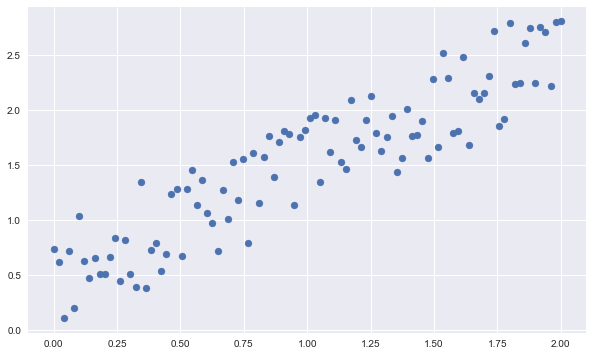

In [10]:
x = np.linspace(0, 2, 100)
y = npr.random(100) + x
plt.scatter(x, y);

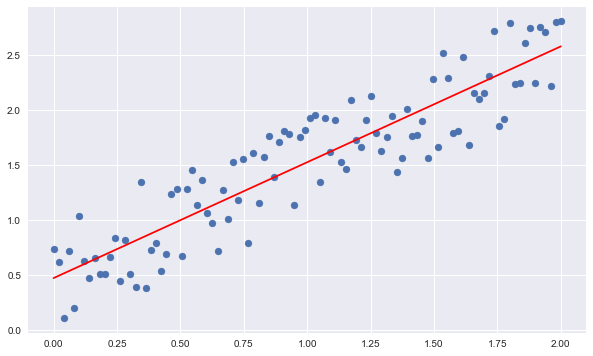

In [11]:
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y);
m = model.coef_
b = model.intercept_
predicted_y = model.predict(x)
plt.scatter(x, y);
plt.plot(x, predicted_y, color='red');

In [12]:
score = model.score(x, y, sample_weight=None)
r2 = r2_score(y, predicted_y)
mse = mean_squared_error(y, predicted_y)
rmse = np.sqrt(mse)
std = np.std(y)
display(
    score,
    r2,
    mse,
    rmse,
    std
)

0.8254752151930345

0.8254752151930345

0.07967345900040602

0.2822648738337911

0.675660111586674

---

### Generalized Linear Models [Wiki](https://en.wikipedia.org/wiki/Generalized_linear_model)

---
---
---

# Supervised ML: Classification

---

__Classification__<br>
Binary Classification<br>
Multiclass Classification<br>

---

### Classifiers

__ANN Artificial Neural Network__<br>
__Decision Tree__<br>
__Probabilistic Discriminative Model__<br>
a probabilistic classification model that directly assigns class labels without computing class-conditional probabilities<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Logistic Regression<br>
__Probabilistic Generative Model__<br>
a probabilistic classification model that involves computing class-conditional probabilities<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Bayesian Classifiers<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Bayesian Network<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Naive Bayes<br>
__KNN K-Nearest Neighbors__<br>
__SVM Support Vector Machine__<br>
__Ensembling__<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Bagging<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Boosting<br>
&nbsp;&nbsp;&nbsp;&nbsp;
Random Forest<br>

---

## Decision Tree

In [13]:
data = pd.read_csv('vertebrate.csv', header='infer')
data

data['Class'] = data['Class'].replace(['fishes', 'birds', 'amphibians', 'reptiles'], 'non-mammals')
data

pd.crosstab([data['Warm-blooded'], data['Gives Birth']], data['Class'])

Y = data['Class']
X = data.drop(['Name', 'Class'], axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)

testY = testData['Class']
testX = testData.drop(['Name', 'Class'], axis=1)
predY = clf.predict(testX)
predictions = pd.concat([testData['Name'], pd.Series(predY, name='Predicted Class')], axis=1)
predictions

accuracy_score(testY, predY)

0.75

---

## Logistic Regression

a probabilistic discriminative model

__Odds__<br>
$$\frac{P(y = 1 | \textbf{x})}{P(y = 0 | \textbf{x})}$$

__Logistic Regression__<br>
$$
\begin{align}
P(y = 1 | x)
&= \frac{1}{1 + \text{exp}^{-w^Tx - b}} \\
&= \sigma(w^Tx + b) \\
\end{align}
$$
the model parameters $(w, b)$ are estimated by optimizing the following regularized negative log-likelihood function<br>
$$(w*, b*) = \text{argmin}_{w, b} - \sum_{i = 1}^N y_i \text{log} \left[ \sigma(w^Tx_i + b) \right] + (1 - y_i) \text{log} \left[ \sigma(w^Tx_i + b) \right] + \frac{1}{C} \Omega ([w, b])$$
where $C$ is a hyperparameter that controls the inverse of model complexity (smaller values imply stronger regularization) while $\Omega(\cdot)$ is the regularization term, which by default, is assumed to be an $l_2$-norm in sklearn<br>

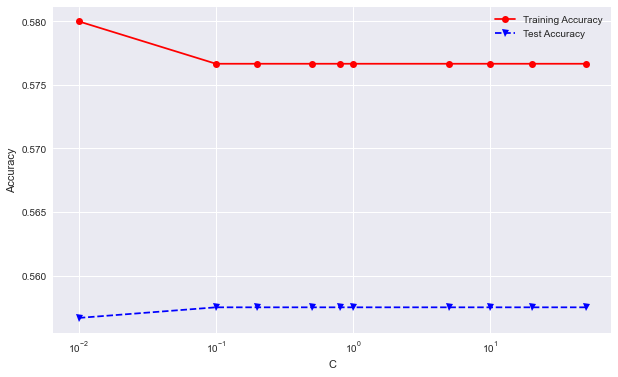

In [135]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
for param in C:
    clf = LogisticRegression(C=param)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))
plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc, 'bv--');
plt.legend(['Training Accuracy', 'Test Accuracy']);
plt.xlabel('C');
plt.xscale('log');
plt.ylabel('Accuracy');

---

## KNN K-Nearest Neighbors Classifier

__KNN__<br>
the class label of a test instance is predicted based on the majority class of its $k$ closest training instances<br>
the number of nearest neighbors $k$ is a hyperparameter that must be provided by the user, along with the distance metric<br>

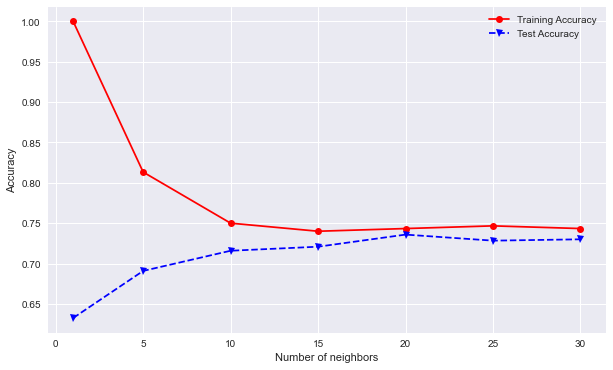

In [126]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--');
plt.legend(['Training Accuracy', 'Test Accuracy']);
plt.xlabel('Number of neighbors');
plt.ylabel('Accuracy');

---

## SVM Support Vector Machine

the model parameters $(w*, b*)$ are estimated by solving the following constrained optimization problem:<br>
$$
\begin{align}
& \text{min}_{w*, b*, {\xi_i}} \frac{|| w ||^2}{2} + \frac{1}{C} \sum_i \xi_i
& \text{s.t.}\, \forall i : y_i \left[ w^T \phi(x_i) + b \right] \ge 1 - \xi_i, \xi_i \ge 0 \\
\end{align}
$$

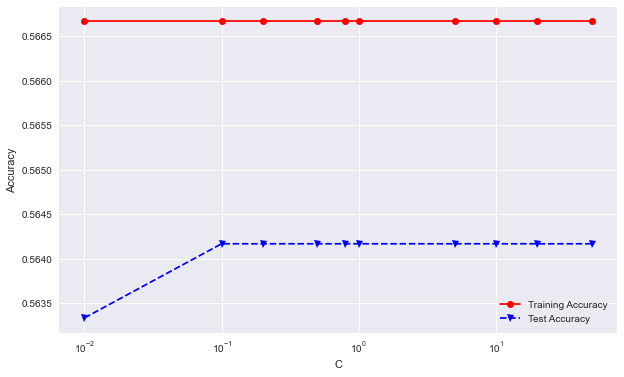

In [120]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []
for param in C:
    clf = SVC(C=param, kernel='linear')
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc, 'bv--');
plt.legend(['Training Accuracy', 'Test Accuracy']);
plt.xlabel('C');
plt.xscale('log');
plt.ylabel('Accuracy');

---

an example of a nonlinear SVM with a Gaussian radial basis function kernel<br>

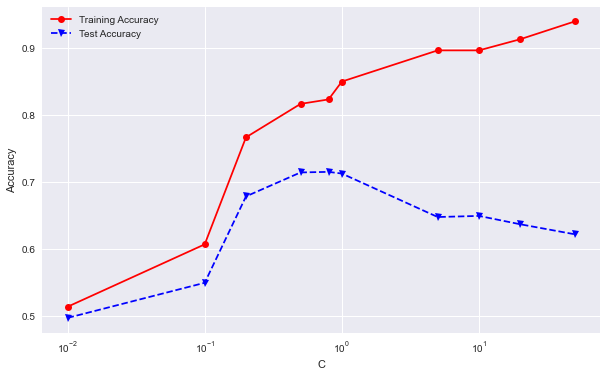

In [136]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []
for param in C:
    clf = SVC(C=param, kernel='rbf', gamma='auto')
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc, 'bv--');
plt.legend(['Training Accuracy', 'Test Accuracy']);
plt.xlabel('C');
plt.xscale('log');
plt.ylabel('Accuracy');

---

## Ensembling

an ensemble classifier constructs a sett of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier<br>

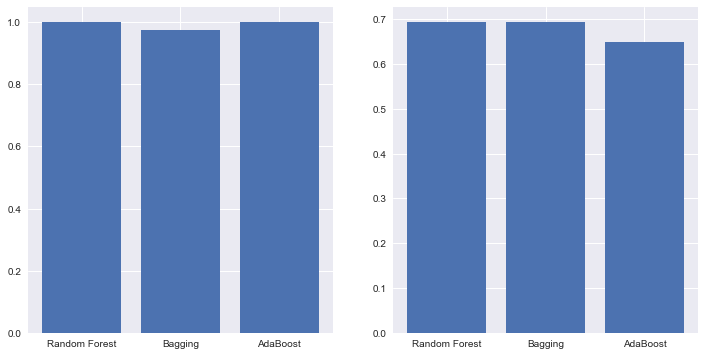

In [139]:
N = 1500
mean1 = [6, 14]  # center of first Gaussian distribution
mean2 = [10, 6]  # center of second Gaussian distribution
mean3 = [14, 14] # center of third Gaussian distribution
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
npr.seed(50)
X = npr.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, npr.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, npr.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*npr.rand(int(N/2), 2)))
Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=numBaseClassifiers)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=numBaseClassifiers)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc);
ax1.set_xticks([1.5,2.5,3.5]);
ax1.set_xticklabels(methods);
ax2.bar([1.5,2.5,3.5], testAcc);
ax2.set_xticks([1.5,2.5,3.5]);
ax2.set_xticklabels(methods);

---

## Binary Classification Performance Evaluation [Wiki](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)

<table>
    <tr>
        <td>
<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">+</th>
            <th scope="col">-</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">+</th>
            <td style="background-color: coral;">$$\text{TP}$$</td>
            <td>$$\text{FN}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">-</th>
            <td>$$\text{FP}$$</td>
            <td style="background-color: coral;">$$\text{TN}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
</table>
        </td><td>
<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">0</th>
            <th scope="col">1</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">0</th>
            <td style="background-color: coral;">$$f_{00}$$</td>
            <td>$$f_{01}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">1</th>
            <td>$$f_{10}$$</td>
            <td style="background-color: coral;">$$f_{11}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
</table>
        </td>
    </tr>
</table>

$f_{ij}$ is the number of instances from class $i$ predicted to be of class $j$ (here, class 0 is positive and class 1 is negative)<br>

__TP True Positive__ is the number of positive examples correctly predicted by the classifier $f_{00}$<br>

__FP False Positive (Type I Error)__ is the number of negative examples wrongly predicted as positive by the classifier $f_{10}$<br>

__FN False Negative (Type II Error)__ is the number of positive examples wrongly predicted as negative by the classifier $f_{01}$<br>

__TN True Negative__ is the number of negative examples correctly predicted by the classifier $f_{11}$<br>

__$\text{T}$ number of correct predictions made by the model__<br>
$$
\begin{align}
\text{T} &\equiv \text{TP} + \text{TN} \\
&= \sum f_{ij} \,(\text{where}\, i = j) \\
&= \sum_{i = 0}^1 f_{ii} \\
&= f_{00} + f_{11} \\
\end{align}
$$

__$\text{F}$ number of incorrect predictions made by the model__<br>
$$
\begin{align}
\text{F} &\equiv \text{FN} + \text{FP} \\
&= \sum f_{ij} \,(\text{where}\, i \ne j) \\
&= \sum_{j \ne i}^1 \sum_{i \ne j}^1 f_{ij} \\
&= \sum_{j \ne i}^1 (f_{0j} + f_{1j}) \\
&= \sum_{j \ne i}^1 f_{0j} + \sum_{j \ne i}^1 f_{1j} \\
&= f_{01} + f_{10} \\
\end{align}
$$

__$\text{N}$ number of predictions made by the model__<br>
$$
\begin{align}
\text{N} &\equiv \text{T} + \text{F} \\
&= \text{TP} + \text{FP} + \text{FN} + \text{TN} \\
&= \sum f_{ij} \\
&= \sum_{j = 0}^1 \sum_{i = 0}^1 f_{ij} \\
&= \sum_{j = 0}^1 (f_{0j} + f_{1j}) \\
&= \sum_{j = 0}^1 f_{0j} + \sum_{j = 0}^1 f_{1j} \\
&= f_{00} + f_{01} + f_{10} + f_{11} \\
\end{align}
$$

__Skew__ $\alpha$ is the ratio of positive data objects to all data objects<br>
$$
\begin{align}
\alpha &= \frac{P}{P + N} & \text{where}\, P \,\text{is the number of actual positives and}\, N \,\text{is the number of actual negatives}
\end{align}
$$

#### Evaluation Measures

__Accuracy__ $a$ is the ratio of correct predictions to all predictions, and takes a value $\in [0, 1]$, where $a = 1$ is a perfect accuracy<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
suitable for balanced classes; not suitable for imbalanced classes, since it favors classifiers that correctly classify the majority class<br>

$$
\begin{align}
a
&= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} \\
&= \frac{\text{T}}{\text{N}} \\
\end{align}
$$

__Error Rate__ $e$ is the ratio of incorrect predictions to all predictions, and takes a value $\in [0, 1]$, where $e = 1$ is a perfect error rate<br>
$$
\begin{align}
e
&= 1 - a
& \text{as the accuracy gets closer to unity, the error rate gets closer to zero, and vice versa} \\
&= \frac{\text{FP} + \text{FN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} \\
&= \frac{\text{F}}{\text{N}} \\
\end{align}
$$



__Precision__ $p$ (PPV Positive Predicted Value) is the ratio of correct predictions of the positive class to the total number of positive predictions<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
sensitive to skew: precision is a useful measure for highly skewed test sets where the positive predictions, even though small in number, are required to be mostly correct<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a classifier that has a high precision is likely to have most of its positive predictions correct<br>

$$p = \frac{\text{TP}}{\text{TP} + \text{FP}}$$



__FDR False Discovery Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is sensitive to the skew<br>

$$
\begin{align}
\text{FDR}
&= 1 - p \\
&= \frac{\text{FP}}{\text{TP} + \text{FP}} \\
\end{align}
$$



_as the precision gets closer to unity, the false discovery rate gets closer to zero, and vice versa_<br>



__TPR True Positive Rate (Recall or Sensitivity)__<br>
the fraction of positive test instances correctly predicted by the classifier<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a classifier with a high TPR has a high chance of correctly identifying the positive instances of the data<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{TPR}
&= \frac{\text{TP}}{\text{TP} + \text{FN}} \\
&= \frac{\text{TP}}{P} \\
\end{align}
$$



__TNR True Negative Rate (Specificity)__<br>
the fraction of negative test instances correctly predicted by the classifier<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
a high TNR value signifies that the classifier correctly classifies any randomly chosen negative instance in the test set<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{TNR}
&= \frac{\text{TN}}{\text{FP} + \text{TN}} \\
&= \frac{\text{TN}}{N} \\
\end{align}
$$



__FPR False Positive Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{FPR}
&= 1 - \text{TNR} \\
&= \frac{\text{FP}}{\text{FP} + \text{TN}} \\
&= \frac{\text{FP}}{N} \\
\end{align}
$$



__FNR False Negative Rate__<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
this evaluation measure is not sensitive to the skew<br>

$$
\begin{align}
\text{FNR}
&= 1 - \text{TPR} \\
&= \frac{\text{FN}}{\text{FN} + \text{TP}} \\
&= \frac{\text{FN}}{P} \\
\end{align}
$$



<table>
    <caption>Binary Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="2"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="2" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">+</th>
            <th scope="col">-</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="4" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">+</th>
            <td style="background-color: coral;">$$\text{TPR} \times \alpha \times \text{N}$$</td>
            <td>$$(1 - \text{TPR}) \times \alpha \times \text{N}$$</td>
            <td>$$\alpha \times \text{N}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">-</th>
            <td>$$(1 - \text{TNR}) \times (1 - \alpha) \times \text{N}$$</td>
            <td style="background-color: coral;">$$\text{TNR} \times (1 - \alpha) \times \text{N}$$</td>
            <td>$$(1 - \alpha) \times \text{N}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
    </tbody>
    <tbody>
        <tr>
            <th rowspan="2" scope="rowgroup">Total</th>
            <td style="border-right: 1px solid black;"></td>
            <td></td>
            <td></td>
            <td>$$\text{N}$$</td>
        </tr>
    </tbody>
</table>

PLR __Positive Likelihood Ratio__ [Wiki](https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_ratio) [Wiki](https://en.wikipedia.org/wiki/Likelihood_ratios_in_diagnostic_testing)<br>
not sensitive to skew<br>
$$\text{PLR} = \frac{\text{TPR}}{\text{FPR}}$$

$F_1$ __Measure__ [Wiki](https://en.wikipedia.org/wiki/F-score) is the harmonic mean of recall and precision<br>
a high $F_1$-measure value ensures that both precision and recall are reasonably high, since the harmonic mean of two numbers tends to be closer to the smaller of the two numbers<br>
sensitive to skew<br>
$$
\begin{align}
F_1
&= \frac{2rp}{r + p} = \frac{2}{\frac{1}{r} + \frac{1}{p}}\\
&= \frac{2 \times \text{TP}}{2 \times \text{TP} + \text{FP} + \text{FN}} \\
&= \frac{2 \times f_{00}}{2 \times f_{00} + f_{10} + f_{01}} \\
\end{align}
$$

$F_{\beta}$ __Measure__ [Wiki](https://en.wikipedia.org/wiki/F-score)<br>
$$
\begin{align}
F_{\beta}
&= \frac{(\beta^2 + 1)rp}{r + \beta^2p}
= \frac{\beta^2rp + rp}{r + \beta^2p}
= \frac{rp + \frac{rp}{\beta^2}}{\frac{r}{\beta^2} + p} \\
&= \frac{(\beta^2 + 1)\text{TP}}{(\beta^2 + 1)\text{TP} + \beta^2\text{FP} + \text{FN}} \\
\end{align}
$$

as $\beta$ approaches $0$, $F_{\beta}$ approaches $p$<br>
$
F_{0}
= \frac{(0 + 1)rp}{r + 0p}
= \frac{rp}{r}
= p
$

as $\beta$ approaches $\infty$, $F_{\beta}$ approaches $r$<br>
$
F_{\infty}
= \frac{rp + \frac{rp}{\infty}}{\frac{r}{\infty} + p}
= \frac{rp}{p}
= r
$

$G$ __Measure__ is the geometric mean of recall and precision<br>
$$
\begin{align}
G
&= \sqrt{rp} \\
&= \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})}} \\
&= \frac{f_{00}}{\sqrt{(f_{00} + f_{10})(f_{00} + f_{01})}} \\
\end{align}
$$

---

In [14]:
a = 1
b = 5
mu_a = (a + b) / 2         # arithmetic mean
mu_g = np.sqrt(a * b)      # geometric mean
mu_h = 2 * a * b / (a + b) # harmonic mean
display(mu_a, mu_g, mu_h)

3.0

2.23606797749979

1.6666666666666667

---

In [15]:
c1 = 1
c2 = 1

TP = int(3e1 * c1)
FP = int(2e1 * c2)
FN = int(0 * c1)
TN = int(5e1 * c2)

T  = int(TP + TN) # correct
F  = int(FP + FN) # incorrect
AP = int(TP + FN) # actual positive
AN = int(TN + FP) # actual negative
PP = int(TP + FP) # predicted positive
PN = int(TN + FN) # predicted negative
N  = int(TP + FP + FN + TN) # all

alpha = AP / N

accuracy             = T / N   # correct over all
error_rate           = F / N   # incorrect over all
precision            = TP / PP # correct positive over all positive
false_discovery_rate = FP / PP # incorrect positive over all positive

true_positive_rate   = TP / AP # correct positive over actual positive
false_negative_rate  = FN / AP # incorrect negative over actual positive
true_negative_rate   = TN / AN # correct negative over actual negative
false_positive_rate  = FP / AN # incorrect positive over actual negative

lines = [
    '{}\t{}\t{}\t{}'.format('', 'pred+', 'pred-', ''),
    '{}\t{}\t{}\t{}'.format('act+', TP, FN, AP),
    '{}\t{}\t{}\t{}'.format('act-', FP, TN, AN),
    '\t\t\t{}'.format(N),
    '',
    '{:5}{:0.3f}'.format('\u03b1', np.round(alpha, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('a', np.round(accuracy, 3), 'e', np.round(error_rate, 3)),
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('p', np.round(precision, 3), 'fdr', np.round(false_discovery_rate, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('r', np.round(true_positive_rate, 3), 'fnr', np.round(false_negative_rate, 3)),
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('tnr', np.round(true_negative_rate, 3), 'fpr', np.round(false_positive_rate, 3)),
]
for line in lines:
    print(line)

	pred+	pred-	
act+	30	0	30
act-	20	50	70
			100

α    0.300

a    0.800	e    0.200
p    0.600	fdr  0.400

r    1.000	fnr  0.000
tnr  0.714	fpr  0.286


---

## Multiclass Classification Performance Evaluation

each entry $f_{ij}$ is the number of instances from class $i$ predicted to be of class $j$<br>

<table>
    <caption>Multiclass Confusion Matrix</caption>
    <!-- the number of columns in the table -->
    <col>
    <col>
    <colgroup span="5"></colgroup>
    <thead>
        <tr>
            <td colspan="2" rowspan="2"></td>
            <th colspan="5" scope="colgroup">Predicted</th>
        </tr>
        <tr>
            <th scope="col">0</th>
            <th scope="col">1</th>
            <th scope="col">2</th>
            <th scope="col">...</th>
            <th scope="col">k</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th rowspan="9" scope="rowgroup">Actual</th>
            <th scope="row" style="border-right: 1px solid black;">0</th>
            <td style="background-color: coral;">$$f_{00}$$</td>
            <td>$$f_{01}$$</td>
            <td>$$f_{02}$$</td>
            <td>$$...$$</td>
            <td>$$f_{0k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">1</th>
            <td>$$f_{10}$$</td>
            <td style="background-color: coral;">$$f_{11}$$</td>
            <td>$$f_{12}$$</td>
            <td>$$...$$</td>
            <td>$$f_{1k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">2</th>
            <td>$$f_{20}$$</td>
            <td>$$f_{21}$$</td>
            <td style="background-color: coral;">$$f_{22}$$</td>
            <td>$$...$$</td>
            <td>$$f_{2k}$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">$$\vdots$$</th>
            <td>$$\vdots$$</td>
            <td>$$\vdots$$</td>
            <td>$$\vdots$$</td>
            <td>$$\ddots$$</td>
            <td>$$\vdots$$</td>
        </tr>
        <tr></tr> <!-- get rid of zebra stripes -->
        <tr>
            <th scope="row" style="border-right: 1px solid black;">k</th>
            <td>$$f_{k0}$$</td>
            <td>$$f_{k1}$$</td>
            <td>$$f_{k2}$$</td>
            <td>$$...$$</td>
            <td style="background-color: coral;">$$f_{kk}$$</td>
        </tr>
    </tbody>
</table>

__$\text{T}$ number of correct predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \,(\text{where}\, i = j) \\
&= \sum_{i = 0}^k f_{ii} \\
&= f_{00} + f_{11} + ... + f_{kk}
& k \,\text{times} \\
&= \text{T}
& k \,\text{terms} \\
\end{align}
$$

__$\text{F}$ number of incorrect predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \,(\text{where}\, i \ne j) \\
&= \sum_{j \ne i}^k \sum_{i \ne j}^k f_{ij} \\
&= \sum_{j \ne i}^k (f_{0j} + f_{1j} + ... + f_{kj}) \\
&= \sum_{j \ne i}^k f_{0j} + \sum_{j \ne i}^k f_{1j} + ... + \sum_{j \ne i}^k f_{kj} \\
&= \underbrace{(f_{01} + f_{02} + ... + f_{0k})}_{k - 1 \,\text{terms}} + \underbrace{(f_{10} + f_{12} + ... + f_{1k})}_{k - 1 \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{k, k - 1})}_{k - 1 \,\text{terms}}
& k \,\text{times} \\
&= \text{F}
& k(k - 1) = k^2 - k \,\text{terms}\\
\end{align}
$$

__$\text{N}$ number of predictions made by the model__<br>
$$
\begin{align}
& \sum f_{ij} \\
&= \sum_{j = 0}^k \sum_{i = 0}^k f_{ij} \\
&= \sum_{j = 0}^k (f_{0j} + f_{1j} + ... + f_{kj}) \\
&= \sum_{j = 0}^k f_{0j} + \sum_{j = 0}^k f_{1j} + ... + \sum_{j = 0}^k f_{kj} \\
&= \underbrace{(f_{00} + f_{01} + ... + f_{0k})}_{k \,\text{terms}} + \underbrace{(f_{10} + f_{11} + ... + f_{1k})}_{k \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{kk})}_{k \,\text{terms}}
& k \,\text{times} \\
&= \text{T} + \text{F} \\
&= \text{N}
& k^2 \,\text{terms}\\
\end{align}
$$

#### Evaluation Measures

__Accuracy__ $a$<br>
$$
\begin{align}
a
&= \frac{\sum_{i = j} f_{ij}}{\sum f_{ij}} \\
&= \frac{f_{00} + f_{11} + ... + f_{kk}}{(f_{00} + f_{01} + ... + f_{0k}) + (f_{10} + f_{11} + ... + f_{1k}) + ... + (f_{k0} + f_{k1} + ... + f_{kk})} \\
&= \frac{\text{T}}{\text{N}} \\
\end{align}
$$

__Error Rate__ $e$<br>
$$
\begin{align}
e
&= 1 - a \\
&= \frac{\sum_{i \ne j} f_{ij}}{\sum f_{ij}} \\
&= \frac{\underbrace{(f_{01} + f_{02} + ... + f_{0k})}_{k - 1 \,\text{terms}} + \underbrace{(f_{10} + f_{12} + ... + f_{1k})}_{k - 1 \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{k, k - 1})}_{k - 1 \,\text{terms}}}{\underbrace{(f_{00} + f_{01} + ... + f_{0k})}_{k \,\text{terms}} + \underbrace{(f_{10} + f_{11} + ... + f_{1k})}_{k \,\text{terms}} + ... + \underbrace{(f_{k0} + f_{k1} + ... + f_{kk})}_{k \,\text{terms}}} \\
&= \frac{\text{F}}{\text{N}} \\
\end{align}
$$

---

In [16]:
f00 = 200
f01 = 5
f02 = 5
f10 = 5
f11 = 100
f12 = 5
f20 = 5
f21 = 5
f22 = 100

T  = int(f00 + f11 + f22) # correct
F  = int(f01 + f02 + f10 + f12 + f20 + f21) # incorrect
A0 = int(f00 + f01 + f02) # actual class 0
A1 = int(f10 + f11 + f12) # actual class 1
A2 = int(f20 + f21 + f22) # actual class 2

P0 = int(f00 + f10 + f20) # predicted class 0
P1 = int(f01 + f11 + f21) # predicted class 1
P2 = int(f02 + f12 + f22) # predicted class 2

N = int(A0 + A1 + A2) # all

alpha0 = A0 / N
alpha1 = A1 / N
alpha2 = A2 / N

accuracy             = T / N   # correct over all
error_rate           = F / N   # incorrect over all

'''
precision            = TP / PP # correct positive over all positive
false_discovery_rate = FP / PP # incorrect positive over all positive

true_positive_rate   = TP / AP # correct positive over actual positive
false_negative_rate  = FN / AP # incorrect negative over actual positive
true_negative_rate   = TN / AN # correct negative over actual negative
false_positive_rate  = FP / AN # incorrect positive over actual negative
'''

lines = [
    '{}\t{}\t{}\t{}\t{}'.format('', 'P0', 'P1', 'P2', ''),
    '{}\t{}\t{}\t{}\t{}'.format('A0', f00, f01, f02, A0),
    '{}\t{}\t{}\t{}\t{}'.format('A1', f10, f11, f12, A1),
    '{}\t{}\t{}\t{}\t{}'.format('A2', f20, f21, f22, A2),
    '\t\t\t\t{}'.format(N),
    '',
    '{:5}{:0.3f}'.format('\u03b10', np.round(alpha0, 3)),
    '{:5}{:0.3f}'.format('\u03b11', np.round(alpha1, 3)),
    '{:5}{:0.3f}'.format('\u03b12', np.round(alpha2, 3)),
    '',
    '{:5}{:0.3f}\t{:5}{:0.3f}'.format('a', np.round(accuracy, 3), 'e', np.round(error_rate, 3)),
]
for line in lines:
    print(line)

	P0	P1	P2	
A0	200	5	5	210
A1	5	100	5	110
A2	5	5	100	110
				430

α0   0.488
α1   0.256
α2   0.256

a    0.930	e    0.070


---

### Bayesian Classification

__Posterior Probability of the target class__<br>
compute the probability of observing a class label $y$ for a data instance given its set of attribute values $\textbf{x}$<br>
$$P(y | \textbf{x}) = \frac{P(\textbf{x} | y)P(y)}{P(\textbf{x})}$$

__Class-Conditional Probability of the attributes given the class label $P(\textbf{x} | y)$__<br>
measures the likelihood of observing $\textbf{x}$ from the distribution of instances belonging to $y$<br>
describes the behavior of instances in the attribute space that are _generated_ from class $y$<br>
if $\textbf{x}$ indeed belongs to class $y$, then we should expect $P(\textbf{x} | y)$ to be high<br>
the use of class-conditional probabilities attempts to capture the process from which the data instances were generated<br>
provide insights about the underlying mechanism behind the generation of attribute values<br>

__Prior Probability $P(y)$__<br>
captures our prior beliefs about the distribution of class labels, independent of the observed attribute values<br>
can either be obtained using expert knowledge, or inferred from historical distribution of class labels<br>

combine one's prior beliefs with the likelihood of obtaining the observed attribute values<br>
Training: learn the parameters for $P(y)$ and $P(\textbf{x} | y)$<br>
$P(y)$ is easily estimated from the training set by computing the fraction of training instances that belong to each class<br>

__Class-Conditional Probability Estimation__<br>
$P(\textbf{x} | y)$ is estimated by considering the fraction of training instances of a given class for every possible combination of attribute values:<br>
Let $X_1$ and $X_2$ be two attributes each of which can take a discrete value from $c_1$ to $c_k$<br>
Let $n^0$ denote the number of training instances belonging to class $0$, out of which $n_{ij}^0$ number of training instances have $X_1 = c_i$ and $X_2 = c_j$<br>
$$P(X_1 = c_i, X_2 = c_j | Y = 0) = \frac{n_{ij}^0}{n^0}$$

---

### Naive Bayes Classifier

__Naive Bayes Assumption__<br>
the class-conditional probability of all attributes $\textbf{x}$ can be factored as a product of class-conditional probabilities of every attribute $x_i$:
$$P(\textbf{x} | y) = \prod_{i = 1}^d P(x_i | y)$$
where every data instance $\textbf{x}$ consists of $d$ attributes $\{x_1, ..., x_d\}$<br>
assumption: the attribute values $x_i$ are conditionally independent of each other, given the class label $y$ (this means that the attributes are influenced only by the target class and if we know the class label, then we can consider the attributes to be independent of each other)<br>

given the naive Bayes assumption, we only need to estimate the conditional probability of each $x_i$ given $Y$ separately, instead of computing the class-conditional probability for every combination of attribute values<br>

__Class-Conditional Probability Estimation under the Naive Bayes Assumption__<br>
count the number of training instances for every one of the $k$ values of an attribute $X$ irrespective of the values of other attributes<br>
the number of parameters needed to learn class-conditional probabilities is $dk$, linear in the number of attributes<br>
$$P(X_1 = c_i, X_2 = c_j | Y = 0) = \frac{n_i^0}{n^0} \times \frac{n_j^0}{n^0}$$

__Naive Bayes Classifier__<br>
computes the posterior probability for a test instance $\textbf{x}$:
$$
\begin{align}
P(y | \textbf{x}) &= \frac{P(y) \prod_{i = 1}^d P(x_i | y)}{P(\textbf{x})} \\
P(y | \textbf{x}) &\propto P(y) \prod_{i = 1}^d P(x_i | y) \\
\end{align}
$$

__Categorical Attribute Conditional Probability Estimation__<br>
Let $X_i$ be a categorical attribute.<br>
The conditional probability $P(X_i = c | y)$ is estimated according to the fraction of training instances in class $y$ where $X_i$ takes on a particular categorical value $c$:<br>
$n$ is the number of training instances belonging to class $y$ out of which $n_c$ number of instances have $X_i = c$<br>
$\sum_c P(X_i = c | y) = 1$<br>
$$P(X_i = c | y) = \frac{n_c}{n}$$

---
---
---

# Statistics

### Frequency Distribution vs Relative Frequency Distribution

Frequency, the number of observations that fall into a category <br>
Relative Frequency, the proportion or percentage in a category (the count in a category relative to the total count over all categories) <br>
Frequency Distribution for a categorical variable, a listing of all categories along with their frequencies/counts <br>
Relative Frequency Distribution, a listing of all categories along with their relative frequencies (given as proportions or percentages) <br>

### CLT Central Limit Theorem

CLT ensures that the majority of "scattered things" are dispersed according to the Gaussian distribution.

### Standard Deviation

Roughly, the average distance values fall from the mean.

### Standardized z-Score

a useful measure of the relative value of any observation in a dataset. <br>
the distance between the observed value and the mean, measured in terms of number of standard deviations. <br>

### PPMCC Pearson's Product-Moment Correlation Coefficient
a measure of the strength and direction of a linear relationship between two quantitative variables <br>
approximately, the correlation value is the average product pf standardized scores for variables x and y <br>

### Regression Analysis and the Estimation of a Regression Equation
an equation that describes the average relationship between a quantitative response variable and one or more explanatory variables <br>

Least Squares (Least Sum of Squared Errors) <br>
the sum of squared differences between the observed values of y and the predicted values is smaller for that line that it is for any other line (the least squares line minimizes the sum of squared prediction errors for the observed data set) <br>

&nbsp;&nbsp;&nbsp;&nbsp;
    $\hat{y}$, called the estimated or predicted $y$, estimates the average (or predicts) $y$ for a specific value of $x$ <br>
    &nbsp;&nbsp;&nbsp;&nbsp;
    the slope of the line estimates the average increase in $y$ for each one-unit increase in $x$ <br>

### Gaussian Distribution

$f(x; \mu, \sigma) = \frac{1}{\sigma^2 \sqrt{2\pi}} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}$ where $\mu$ is the mean and $\sigma$ is the the standard deviation <br>

#### Empirical Rule for normally-distributed data
About 68% of the values have z-scores $\in [-1, 1]$ <br>
About 95% of the values have z-scores $\in [-2, 2]$ <br>
About 99.7% of the values have z-scores $\in [-3, 3]$ <br>

### Standard Normal Distribution

$f(x; 0, 1) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$ where $\mu = 0$ and $\sigma = 1$

---
---
---

# Probability Theory

Let $X$ be a variable that can take any discrete value from the set $\{x_1, ..., x_k\}$<br>

__Random Variable__<br>
a variable that has probabilities associated with each possible outcome/value<br>

__Relative Frequency__<br>
If $X$ has the value $x_i$ for $n_i$ data objects, then the relative frequency with which we observe the event $X = x_i$ is $\frac{n_i}{N}$ where $N = \sum_{i = 1}^k n_i$ is the total number of data objects (i.e., the size of the dataset).<br>

__Probability__<br>
The probability of an event $e$ (e.g., $P(X = x_i)$) measures how likely it is for the event $e$ to occur.<br>
The frequentist approach to probability is based on the relative frequency of events.<br>

__Axioms of Probability Theory__<br>
$$
\begin{align}
1. & P \in [0, 1] \\
2. & \sum_i P(X = x_i) = 1 \\
\end{align}
$$

__Joint Probability__<br>
Let $X$ and $Y$ be two random variables that can each take $k$ discrete values.<br>
Let $n_{ij}$ be the number of times we observe $X = x_i$ and $Y = y_j$ out of a total number of $N$ occurrences.<br>
$$P(X = x_i, Y = y_i) = \frac{n_{ij}}{N}$$
Symmetry of Joint Probability: $P(X = x_i, Y = y_i) = P( Y = y_i, X = x_i)$

__Marginal Probability of__ $X$<br>
$$\sum_{j = 1}^k P(X = x_i, Y = y_j) = \frac{\sum_{j = 1}^k n_{ij}}{N} = \frac{n_i}{N} = P(X = x_i)$$
where $n_i$ is the total number of times we observe $X = x_i$ irrespective of the value of $Y$ and
$\frac{n_i}{N}$ is the probability of observing the remaining variable $X$<br>

__Conditional Probability__<br>
Let $P(Y | X)$ be the conditional probability of observing the random variable $Y$ whenever the random variable $X$ takes a particular value (the probability of observing $Y$ conditioned on the outcome of $X$).<br>
$$
\begin{align}
P(Y | X) &= \frac{P(X, Y)}{P(X)} \\
P(X, Y) &= P(Y | X) \times P(X) \\
&= P(X | Y) \times P(Y) \\
\end{align}
$$

__Bayes Theorem__<br>
relates the conditional probabilities $P(Y | X)$ and $P(X | Y)$<br>
Likelihood $P(X | Y)$<br>
Prior $P(Y)$<br>
Posterior $P(Y | X)$<br>
Normalization Constant or Probability of Evidence $P(X)$ (the marginal probability of $X$)<br>
$$
\begin{align}
P(Y | X) &= \frac{P(X | Y)P(Y)}{P(X)} \\
&= \frac{P(X | Y)P(Y)}{\sum_{i = 1}^k P(X, y_i)} \\
&= \frac{P(X | Y)P(Y)}{\sum_{i = 1}^k P(X | y_i)P(y_i)} \\
\end{align}
$$

__Conditional Independence__<br>
Let $\textbf{X}_1$, $\textbf{X}_2$, and $\textbf{Y}$ be three sets of random variables.<br>
The variables in $\textbf{X}_1$ are conditionally independent of $\textbf{X}_2$, given $\textbf{Y}$, if:<br>
$$P(\textbf{X}_1 | \textbf{X}_2, \textbf{Y}) = P(\textbf{X}_1 | \textbf{Y})$$

__Joint Conditional Probability__<br>
$$
\begin{align}
P(\textbf{X}_1, \textbf{X}_2 | \textbf{Y}) &= \frac{P(\textbf{X}_1, \textbf{X}_2, \textbf{Y})}{P(\textbf{Y})} \\
&= \frac{P(\textbf{X}_1, \textbf{X}_2, \textbf{Y})}{P(\textbf{X}_2, \textbf{Y})} \times \frac{P(\textbf{X}_2, \textbf{Y})}{P(\textbf{Y})} \\
&= P(\textbf{X}_1 | \textbf{X}_2, \textbf{Y}) \times P(\textbf{X}_2 | \textbf{Y}) \\
&= P(\textbf{X}_1 | \textbf{Y}) \times P(\textbf{X}_2 | \textbf{Y}) \\
\end{align}
$$

---
---
---

# Stochastic Processes and Time Series

---

__Stochastic Methods__<br>
Branching Processes<br>
Conditioning<br>
Counting Paths<br>
Difference Equations<br>
Generating Functions<br>
Markov Chains<br>
Martingales<br>
Mirroring<br>
Random Walk Analysis<br>
Time Reversal<br>

---

### Random Walk

__Random Walk__ is a mathematical object; namely, it is a stochastic sequence $\{S_n\}$ on some mathematical space, where $\{X_k\}$ are iid independent and identically distributed random variables.<br>
$$S_n = \sum_{k = 1}^n X_k \,\text{with}\, S_0 = 0$$

The random walk is _simple_ if $X_k = \pm 1$ with $P(X_k = 1) = p$ and $P(X_k = -1) = 1 - p = q$<br>

A simple random walk is _symmetric_ if the particle has the same probability for each of the neighboring points<br>

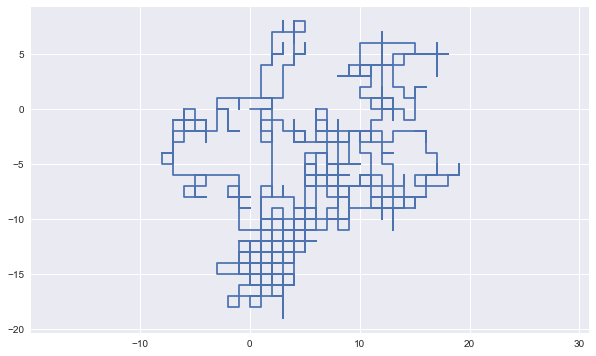

In [17]:
# this is a symmetric simple random walk over Z^2

n = 1000
mu = 0
x = np.zeros([1000, 2])
x[0, 0] = mu
i = npr.randint(1, 5, n)
for t in range(1, n):
    if i[t] == 1:
        x[t,0] = x[t - 1,0] + 1
        x[t,1] = x[t - 1,1]
    elif i[t] == 2:
        x[t,0] = x[t - 1,0] - 1
        x[t,1] = x[t - 1,1]
    elif i[t] == 3:
        x[t,0] = x[t - 1,0]
        x[t,1] = x[t - 1,1] + 1
    elif i[t] == 4:
        x[t,0] = x[t - 1,0]
        x[t,1] = x[t - 1,1] - 1
plt.plot(x[:,0], x[:,1]);
plt.axis('equal');

---

# ARIMA(0, 1, 0)
ARIMA(0, 1, 0), or I(1), is just a random walk<br>
$$y_t = \mu + y_{t - 1} + \epsilon_t$$

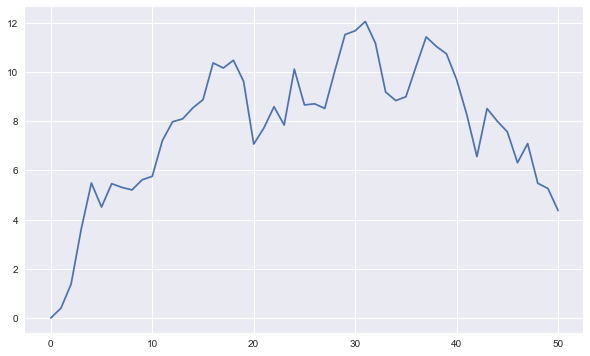

In [18]:
npr.seed(0) # uncomment for deterministic output; comment for random output
n = 50
wn = npr.standard_normal(n + 1)
mu = 0
x = np.linspace(0, n, n + 1)
y = np.zeros(n + 1)
y[0] = mu
for t in range(1, n + 1):
    y[t] = y[t - 1] + wn[t]
plt.plot(x, y);

---

# ARIMA(0, 0, 1)
ARIMA(0, 0, 1) is just Moving Average MA(1)<br>
$$\hat{y_t} = \mu + \theta_1\epsilon_{t - 1}$$
$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t - 1}$$

__MA(q) = ARIMA(0, 0, q)__<br>
$$\hat{y_t} = \mu + \theta_1\epsilon_{t - 1} + ... + \theta_q\epsilon_{t - q}$$
$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t - 1} + ... + \theta_q\epsilon_{t - q}$$

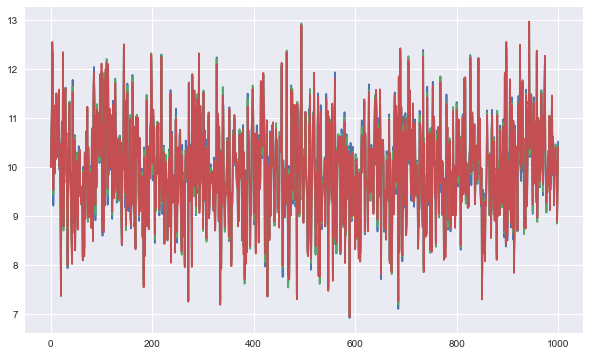

In [19]:
npr.seed(0) # uncomment for deterministic output; comment for random output

n     = 1000
wn    = npr.standard_normal(n + 1) # white noise error terms
mu    = 10
theta = np.array([0.1, 0.1, 0.1])  # weights
x     = np.linspace(0, n, n + 1)

y     = np.zeros(n + 1)
y[0]  = mu

y2    = np.zeros(n + 1)
y2[0] = mu

y3    = np.zeros(n + 1)
y3[0] = mu

for t in range(1, n + 1):
    y[t] = mu + wn[t] + np.dot(theta[:1], wn[t - 1])
    y2[t] = mu + wn[t] + np.dot(theta[:2], [wn[t - 1], wn[t - 2]])
    y3[t] = mu + wn[t] + np.dot(theta[:3], [wn[t - 1], wn[t - 2], wn[t - 3]])

plt.plot(x, y, x, y2, x, y3);

---

__Rolling Statistics__<br>
SMA Simple Moving Average<br>
Central Moving Average<br>
CMA Cumulative Moving Average<br>
EWMA Exponentially-Weighted Moving Average<br>
Standard Deviation<br>

__Correlation__<br>
__Cross Correlation__<br>
__ACF Autocorrelation__ and __PACF Partial Autocorrelation__<br>
a measure of how closely current values are correlated with past values<br>

__Decomposition__ (trend, periodicity, noise)<br>
__Hodrick-Prescott Filter__<br>
$$\text{min}_{\tau} \left( \sum_{t=1}^T (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} [(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})^2] \right)$$

__AR Autoregression__<br>
__MA Moving-Average Model__<br>
__ARIMA Autoregressive Integrated Moving Average__<br>
__ARMA Autoregessive Moving Average__<br>
predict future valies on the basis of past values and past errors<br>
assumes stationarity<br>
assumes non stationarity<br>
__GARCH Generalized Autoregressive Conditional Heteroskedasticity__<br>

__SMA$_k$ Simple Moving Average__ [Wiki](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average_(boxcar_filter))<br>
dataset $= \{x_1, ..., x_n\}$<br>
window $k$<br>
$$
\text{SMA}_k
=
\frac{x_{n - k + 1} + x_{n - k + 2} + ... + x_n}{k}
=
\frac{1}{k} \sum_{i = n - k + 1}^{n} x_i
$$

$$
SMA_{k, next}
=
\frac{1}{k} \sum_{i = n - k + 2}^{n + 1} x_i
=
\frac{1}{k} (\underbrace{x_{n - k + 2} + x_{n - k + 3} + ... + x_n + x_{n + 1}}_{= \sum_{i = n - k + 2}^{n + 1} x_i} + \underbrace{x_{n - k + 1} - x_{n - k + 1}}_{= 0})
=
\underbrace{\frac{1}{k} (x_{n - k + 1} + x_{n - k + 2} + ... + x_n)}_{= \text{SMA}_{k, prev}} - \frac{x_{n - k + 1}}{k} + \frac{x_{n + 1}}{k}
=
\text{SMA}_{k, prev} + \frac{1}{k} (x_{n + 1} - x_{n - k + 1})
$$

__CMA Cumulative Moving Average__ [Wiki](https://en.wikipedia.org/wiki/Moving_average#Cumulative_moving_average)<br>
$$\text{CMA}_n = \frac{x_1 + ... + x_n}{n}$$
$$\text{CMA}_{n + 1} = \frac{x_{n + 1} + n\text{CMA}_n}{n + 1}$$

---
---
---

# DSP Digital Signal Processing and Filters

---

__SMA Simple Moving Average FIR Finite Impulse Response Filter__<br>
$$y[n] = \frac{1}{L} \sum_{k = 0}^{L - 1} x[n - k]$$

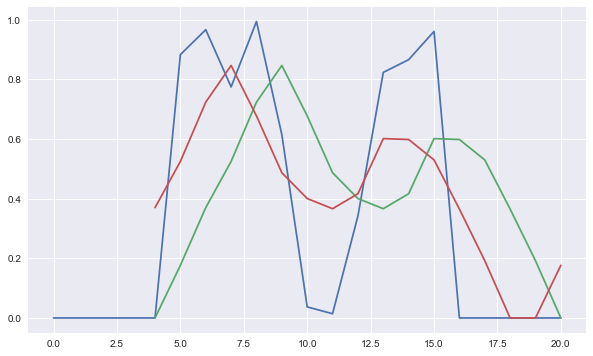

In [20]:
# a simple moving average filter implemented in NumPy
# the signal must be padded with a sufficient number 0s (i.e., "no signal") on either side of the signal

n = 10 # signal size
w = 5  # window size
x = np.linspace(0, n + 2 * w, n + 2 * w + 1)
y = np.concatenate([np.zeros(w), np.random.random(n + 1), np.zeros(w)])

roll_avg = np.convolve(y, np.ones(w), 'valid') / w
plt.plot(x, y);
plt.plot(x[w - 1:], roll_avg);
plt.plot(x[w - 1:], np.roll(roll_avg, -2));

---

experimenting with complex periodic sinusoidal waves

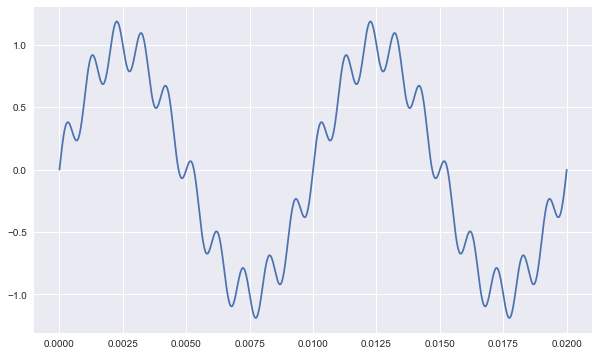

In [21]:
A1 = 1
f1 = 1e2
t = np.linspace(0, 0.02, 1001)
y1 = A1 * np.sin(2 * np.pi * f1 * t)
A2 = 0.2
f2 = 1e3
y2 = A2 * np.sin(2 * np.pi * f2 * t)
plt.plot(t, y1 + y2);

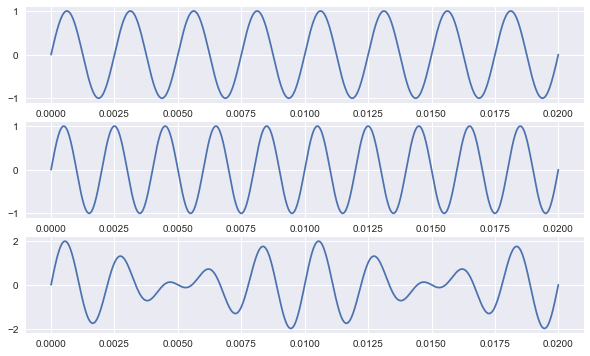

In [22]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 4e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 1
f2 = 5e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

fig, ax = plt.subplots(3);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y1 + y2);

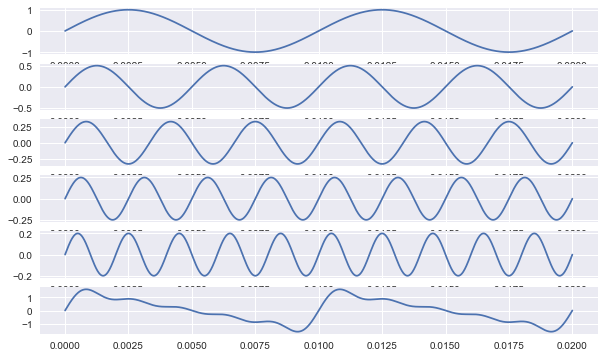

In [23]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.5
f2 = 2e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

A3 = 0.33
f3 = 3e2
y3 = A3 * np.sin(2 * np.pi * f3 * t)

A4 = 0.25
f4 = 4e2
y4 = A4 * np.sin(2 * np.pi * f4 * t)

A5 = 0.2
f5 = 5e2
y5 = A5 * np.sin(2 * np.pi * f5 * t)

fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

---
---
---

# Mathematical Finance

---

__Annualized Standard Deviation__ $=$ Daily Standard Deviation $\times \sqrt{252}$<br>

__NPV Net Present Value__<br>

__Present Discounted Value__<br>

__Sharpe Ratio__<br>
$\frac{R_p - R_f}{\sigma_p} =$ Annualized_Average_Returns $\times 252$ divided by Annualized_Standard_Deviation $\times \sqrt{252}$<br>

    Rp Portfolio Return
    Rf Risk-Free Rate, the return that one expects if investing in securities that effectively offer a guaranteed return (e.g., 30-day U.S. government T-Bills)

---

### TVM Time Value of Money

$FV = PV\left(1 + \frac{i}{n}\right)^{nt}$<br>
$PV = FV\left(1 + \frac{i}{n}\right)^{-nt}$

    FV future value of money
    PV present value of money
    i interest rate
    n number of compounding periods per year
    t number of years

In [24]:
def calc_fv (pv, i, n, t):
    '''
    Calculate the future value of money.
    Parameters
    ==========
      pv (float) present value of money
      i  (float) rate of return
      n  (int)   number of compounding periods per unit time
      t  (int)   time
    Return
    ======
      fv (float) future value of money
    '''
    fv = pv*(1 + ii/nn)**(nn*t)                  # future value of money
    return fv
def calc_pv (fv, i, n, t):
    '''
    Calculate the present value of money.
    Parameters
    ==========
      fv (float) future value of money
      i  (float) rate of return
      n  (int)   number of compounding periods per unit time
      t  (int)   time
    Return
    ======
      pv (float) present value of money
    '''
    pv = fv/(1 + ii/nn)**(nn*t)                  # present value of money
    return pv

In [25]:
pv = 1000                                    # present value of money
i = np.linspace(0.0, 0.3, 301)               # rates of return
n = np.array([1, 4, 52, 365, 60*60*24*7*52]) # number of compounding periods
ii, nn = np.meshgrid(i, n)
t = 5                                        # time horizon in years
fv = calc_fv(pv, ii, nn, t)
np.round(fv[:,-5:], 2)

array([[3656.16, 3670.29, 3684.46, 3698.67, 3712.93],
       [4169.52, 4188.97, 4208.51, 4228.14, 4247.85],
       [4374.55, 4396.35, 4418.26, 4440.28, 4462.41],
       [4390.31, 4412.3 , 4434.4 , 4456.61, 4478.93],
       [4392.95, 4414.97, 4437.1 , 4459.34, 4481.69]])

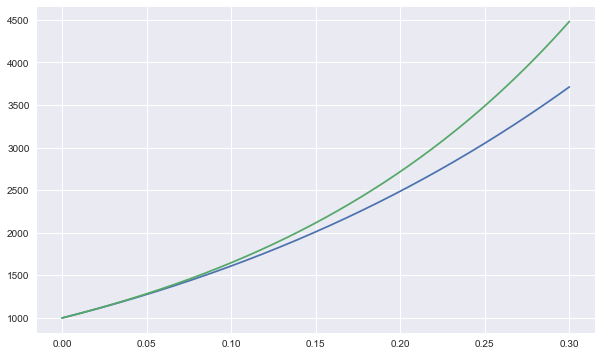

In [26]:
plt.plot(ii[0], fv[0], ii[4], fv[4]);

---
---
---

# Mathematical Functions

---

__Ramp Function__ [Wiki](https://en.wikipedia.org/wiki/Ramp_function)<br>
$$
R(x)=
\begin{cases}
x & x \ge 0 \\
0 & x \lt 0 \\
\end{cases}
=
\text{max}\, (x, 0)
$$

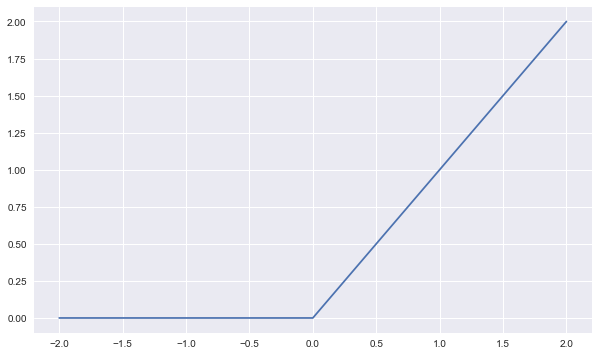

In [106]:
x = np.linspace(-2, 2, 4001)
a = -1
b = 1
y = np.where(x < 0, 0, x)
plt.plot(x, y);

---

__Heaviside Step Function__ [Wiki](https://en.wikipedia.org/wiki/Heaviside_step_function)<br>
$$
H(x)=
\begin{cases}
1 & x \gt 0 \\
0 & x \lt 0 \\
\end{cases}
$$

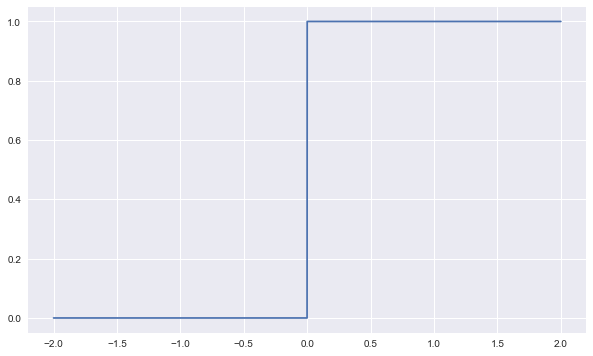

In [107]:
x = np.linspace(-2, 2, 4001)
a = -1
b = 1
y = np.where(x < 0, 0, 1)
plt.plot(x, y);

---

__Continuous Uniform Distribution__ [Wiki](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)<br>
$$
f(x)=
\begin{cases}
\frac{1}{b - a} &\text{for}\, a \le x \le b \\
0 &\text{for}\, x \lt a \,\text{or}\, x \gt b \\
\end{cases}
$$

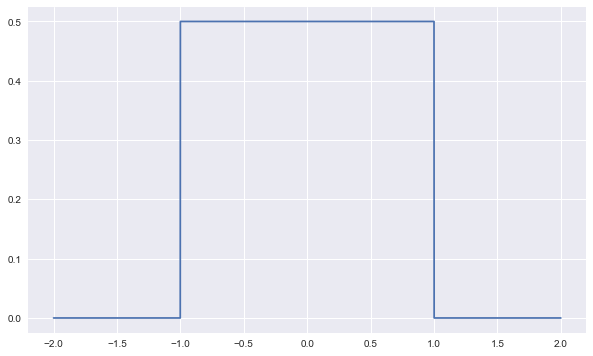

In [108]:
x = np.linspace(-2, 2, 4001)
a = -1
b = 1
y = np.where((x < a) | (x > b), 0, 1/(b-a))
plt.plot(x, y);

---

__Boxcar Function__ [Wiki](https://en.wikipedia.org/wiki/Boxcar_function)<br>
any function which is zero over the entire real line, except for a single interval, where it is equal to a constant<br>
$$\text{boxcar}(x) = (b - a)Af(a, b; x) = A(H(x - a) - H(x - b))$$
$A$ is a constant<br>
$f(a, b; x)$ is the uniform distribution of $x$ for the interval $[a, b]$<br>
$H(x)$ is the Heaviside step function<br>

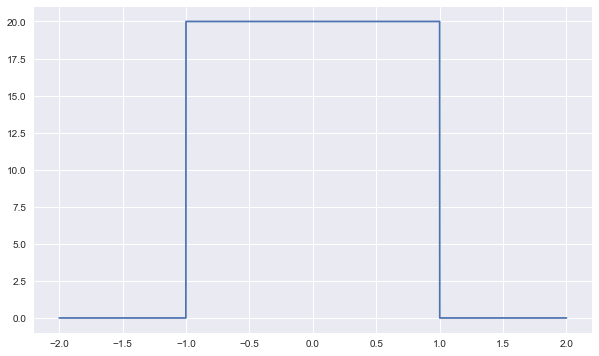

In [109]:
x = np.linspace(-2, 2, 4001)
A = 20
a = -1
b = 1
y = np.where((x < a) | (x > b), 0, A)
plt.plot(x, y);

---
---
---

# Resources

Goodfellow, Ian, Yoshua Bengio, & Aaron Courville. (2016). _Deep Learning_. MIT Press. [Home](https://www.deeplearningbook.org).<br>

Hastie, Trevor, Robert Tibshirani, & Jerome Friedman. (2009). _The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2nd Ed_. Springer Series in Statistics. [Home](https://web.stanford.edu/~hastie/ElemStatLearn/).<br>

Tan, Pang-Ning et al. (2019). _Introduction to Data Mining, 2nd Ed_. Pearson. [Home](https://www-users.cs.umn.edu/~kumar001/dmbook/index.php).<br>

https://en.wikipedia.org/wiki/Definite_symmetric_matrix<br>
https://en.wikipedia.org/wiki/Matrix_calculus<br>
https://en.wikipedia.org/wiki/Functional_derivative<br>
https://en.wikipedia.org/wiki/Optimality_criterion<br>
https://en.wikipedia.org/wiki/Residual_sum_of_squares<br>
https://www.youtube.com/watch?v=ZUU57Q3CFOU<br>
https://www.youtube.com/watch?v=MC7l96tW8V8<br>
https://www.youtube.com/watch?v=Z0wELiinNVQ<br>
http://www.cs.uu.nl/docs/vakken/mpr/linreg-math.pdf<br>
https://atmos.uw.edu/~dennis/MatrixCalculus.pdf<br>

---
---
---

In [27]:
# toy data
data = {
    'tid': np.arange(1, 11),
    'home_owner': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'marital_status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'annual_income': [125e3, 100e3, 70e3, 120e3, 95e3, 60e3, 220e3, 85e3, 75e3, 90e3],
    'defaulted_borrower': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
}
df = pd.DataFrame(data)
df

,tid,home_owner,marital_status,annual_income,defaulted_borrower
0,1,Yes,Single,125000.0,No
1,2,No,Married,100000.0,No
2,3,No,Single,70000.0,No
3,4,Yes,Married,120000.0,No
4,5,No,Divorced,95000.0,Yes
5,6,No,Married,60000.0,No
6,7,Yes,Divorced,220000.0,No
7,8,No,Single,85000.0,Yes
8,9,No,Married,75000.0,No
9,10,No,Single,90000.0,Yes


In [28]:
P_yes = df[df['defaulted_borrower']=='Yes'].shape[0]/df.shape[0]
P_no = df[df['defaulted_borrower']=='No'].shape[0]/df.shape[0]
P_no

0.7

---